In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import pickle

## Linear Models
A linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the bias term (also called the intercept term)
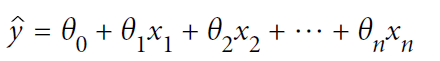

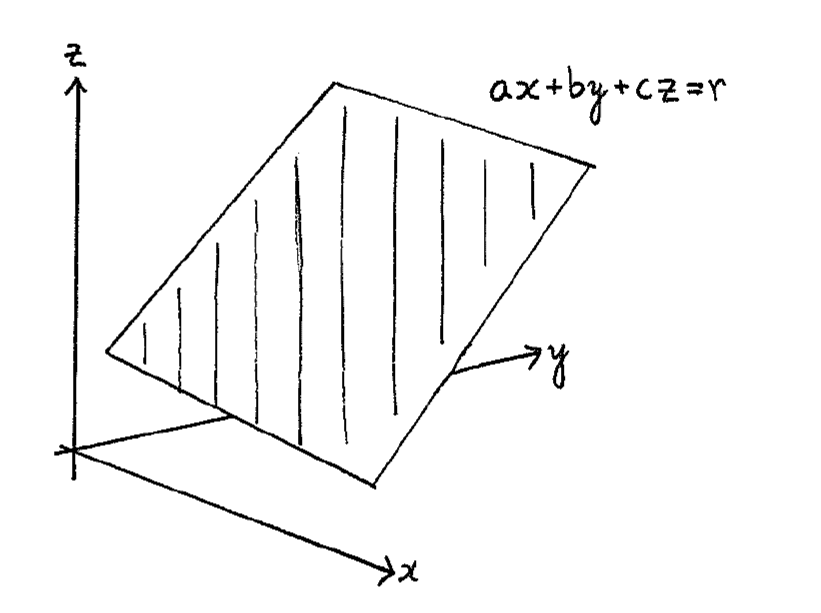

#### How do we train Linear Models
By Minimizing Errors using some form of Error function e.g. MSE:
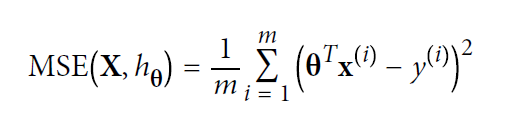


#### Closed Form solution based on SVD for minimizing this error function
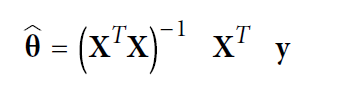


In [ ]:

X = 2 * np.random.rand(100, 1)
y = 4 * X + 6 + np.random.randn(100, 1)

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("X", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
X[:10]

In [ ]:
ones = np.ones((100, 1))

In [ ]:
X_bias = np.c_[ones, X]  # add x0 = 1 to training each instance

In [ ]:
X_bias.shape

In [ ]:
X_bias[:10]

In [ ]:
best_weights = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y)

In [ ]:
best_weights

In [ ]:
X_new = np.array([[0],
                  [2]
                 ])
X_new_with_bias = np.c_[np.ones((2, 1)), X_new]
X_new_with_bias

In [ ]:
y_predict = X_new_with_bias.dot(best_weights)
y_predict

In [ ]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

In [ ]:
lin_reg.predict(X_new)

Computational Complexity of Closed form solution is (n+1)x(n+1)

## Gradient Descend: An iterative approach to minimizing error function



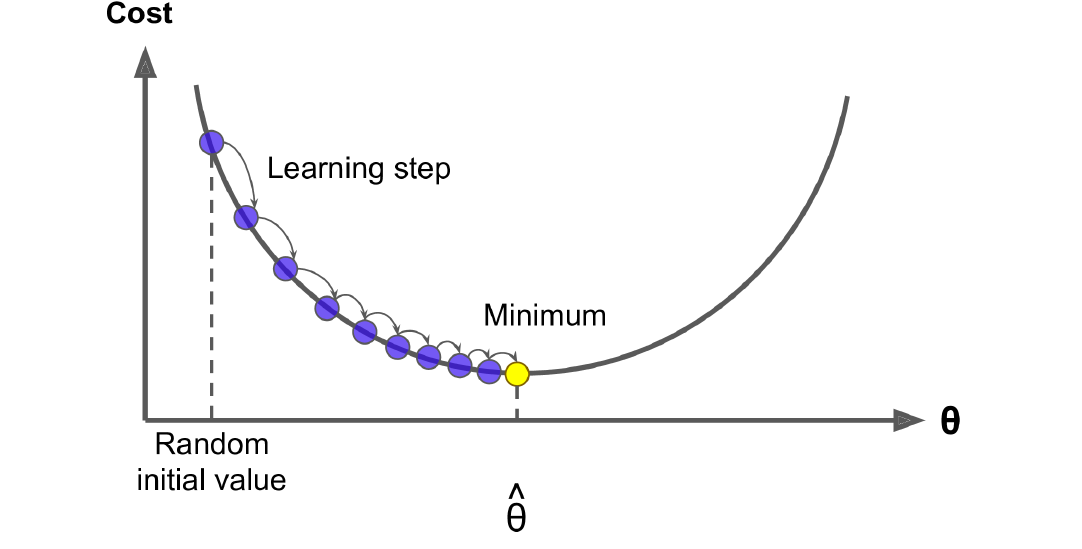

#### Learning Step or Learning Rate
An important parameter in Gradient Descent is the size of the steps, determined by the learning rate hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time

#### Learning rate too small

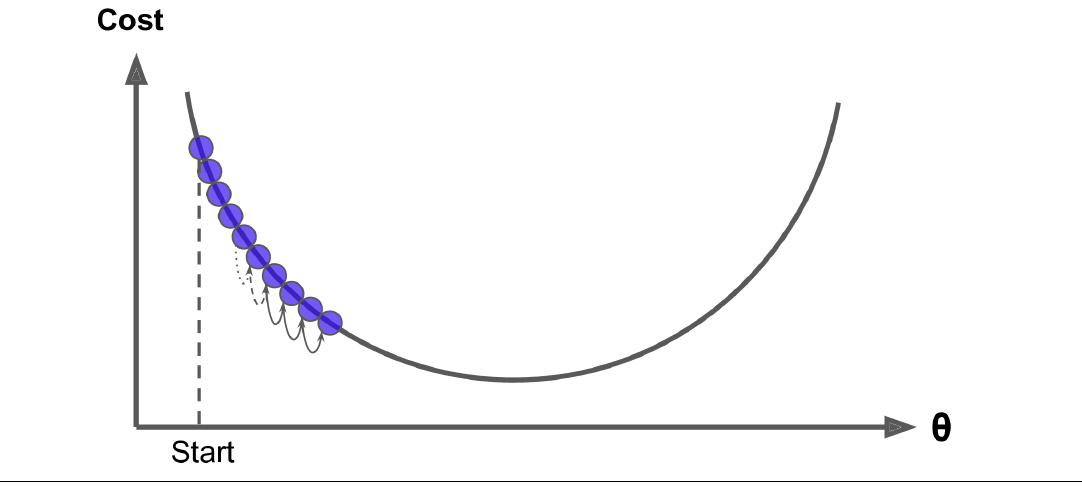


#### Learning Rate too large

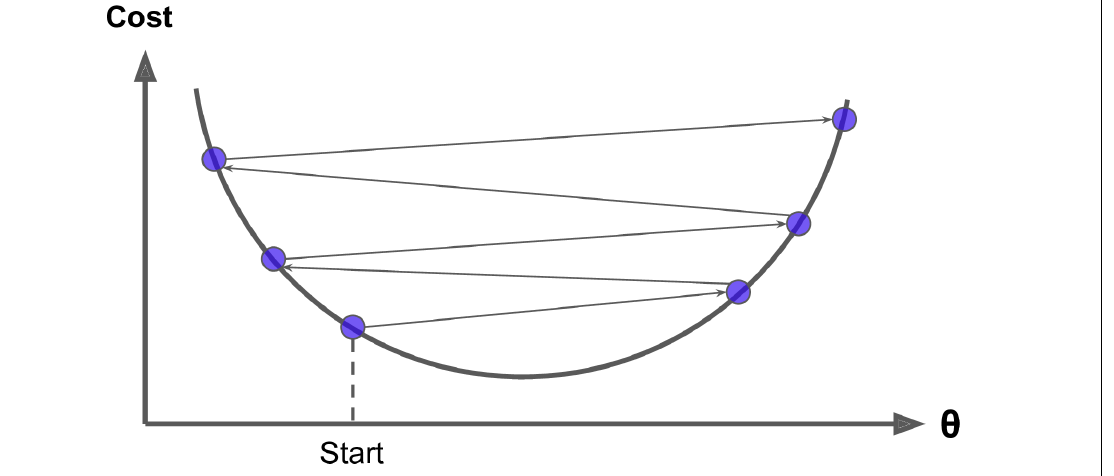

Not all cost functions look like nice regular bowls.In those cases, convergence to the minimum can become very difficult.

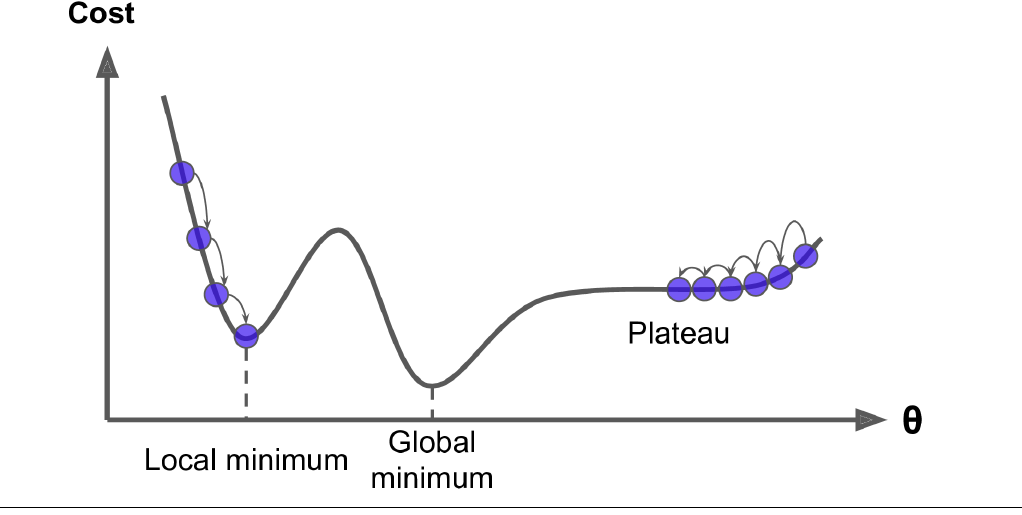

#### Convex functions have a Global minimum

#### Scaling
When using Gradient Descent, you should ensure that all features have a similar scale (e.g., using Scikit-Learn’s StandardScaler class), or else it will take much longer to converge.

### Gradients:
How much the cost function will change if you change weights of a specific input feature just a little bit. This is called a partial derivative.

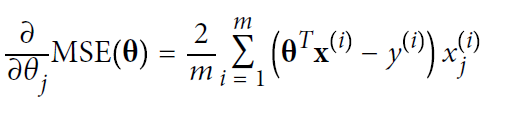

In Matrix form (as in our case) gradients are given by:
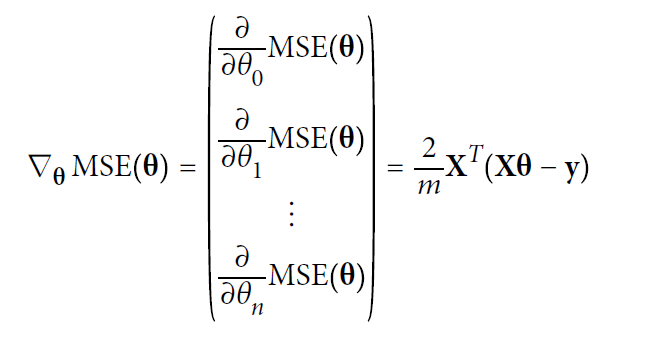

Once we calculate the gradient vector, which points uphill (positive), just adjust the weights to go in the opposite direction  towards downhill. This means subtracting ∇θMSE(θ) from θ scaled by the learning rate

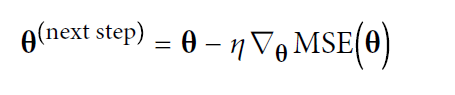

In [ ]:
lr = 0.1  # learning rate
n_iterations = 1000
m = 100

In [ ]:
weights = np.random.randn(2,1)  # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_bias.T.dot(X_bias.dot(weights) - y)
    weights = weights - lr * gradients

In [ ]:
weights

In [ ]:
X_new_with_bias.dot(weights)

In [ ]:
def batch_gradient_descend(X,y,n_epochs=1000,lr=0.1):
    m = len(X)
    weights = np.random.randn(X.shape[1],1)  # random initialization
    for epoch in range(n_epochs):
        gradients = 2/m * X.T.dot(X.dot(weights) - y)
        weights = weights - lr * gradients
    return weights

In [ ]:
weights = batch_gradient_descend(X_bias,y)
X_new_with_bias.dot(weights)

### Stochastic Gradient Descend

In [ ]:
def stochastic_gradient_descend(X,y,n_epochs=50):
    t0, t1 = 5, 50  # learning schedule hyperparameters
    def learning_schedule(t):
        return t0 / (t + t1)

    weights = np.random.randn(X.shape[1],1)
    m = len(X)
    for epoch in range(n_epochs):
        for i in range(m):
            random_x = np.random.randint(m)
            xi = X[random_x:random_x+1]
            yi = y[random_x:random_x+1]
            gradients = 2 * xi.T.dot(xi.dot(weights) - yi)
            lr = learning_schedule(epoch * m + i)
            weights = weights - lr * gradients
    return weights       

In [ ]:
weights = stochastic_gradient_descend(X_bias,y)
X_new_with_bias.dot(weights)

In [ ]:
weights

**Important**
When using Stochastic Gradient Descent, the training instances must be independent and identically distributed (IID), to ensure
that the parameters get pulled towards the global optimum, on average. 

A simple way to ensure this is to shuffle the instances during training (e.g., pick each instance randomly, or shuffle the training set at the beginning of each epoch). If you do not do this, for example if the instances are sorted by label, then SGD will start by optimizing for one label, then the next, and so on, and it will not settle close to the global minimum.

### Minibatch Gradient Descend

In [ ]:
def mini_batch_gradient_descend(X,y,n_epochs=50,batch_size=10):
    t0, t1 = 5,50  # learning schedule hyperparameters
    def learning_schedule(t):
        return t0 / (t + t1)

    weights = np.random.randn(X.shape[1],1)
    for epoch in range(n_epochs):
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0,m,batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradients = 2 * xi.T.dot(xi.dot(weights) - yi)
            lr = learning_schedule(epoch * m + i)
            weights = weights - lr * gradients
    return weights       

In [ ]:
weights = mini_batch_gradient_descend(X_bias,y)
weights

In [ ]:
X_new_with_bias.dot(weights)

In [ ]:
y.shape

In [ ]:
y.ravel().shape

In [ ]:
y.reshape(-1).shape

In [ ]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

In [ ]:
sgd_reg.predict(X_new)

## Bias Variance Tradeoff

**Bias**
Due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most
likely to underfit the training data

**Variance**
Due to model’s excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance, and thus to overfit the training data.

**Irreducible error**
Due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers).


Increasing a model’s complexity will typically increase its variance and reduce its bias.
Conversely, reducing a model’s complexity increases its bias and reduces its variance.
This is why it is called a tradeoff.

## Regularization

### Ridge Regression
A regularization term equal to 
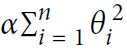
 is added to the cost function.
 
This forces the learning algorithm to not only fit the data but also keep the model
weights as small as possible.

Note that the regularization term should only be added to the cost function during training. Once the model is trained, you want to evaluate the model’s performance using the unregularized performance measure.

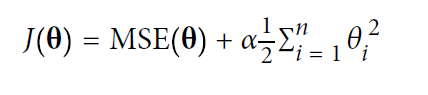

The hyperparameter α controls how much you want to regularize the model.

**If α = 0 then Ridge Regression is just Linear Regression**.

**If α is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean**

**Important: Scale the data (e.g., using a StandardScaler) before performing Ridge Regression, as it is sensitive to the scale of the input features. This is true of most regularized models.**

In [ ]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict(X_new)

In [ ]:
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict(X_new)

### Lasso Regression
Another regularized version of Linear Regression: just like Ridge, it adds a regularization term to the cost function, but it uses the ℓ1 norm of the weight vector instead of half the square of the ℓ2 norm

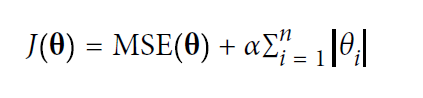


Tends to reduce the useless features weights down to 0

In [ ]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict(X_new)

### Elastic Net
A balance between Ridge and Lasso
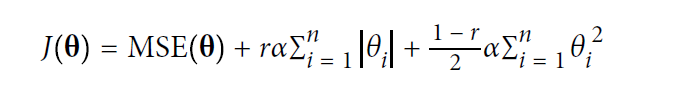

The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is equivalent to Lasso Regression

In [ ]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict(X_new)